In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    #print("A = ",A)
    #print("psi = ",psi)
    return (-1*np.matmul(A,psi))

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0]], [x[0], 0]]
    #H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, x[1]], [x[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

def foS(x, alpha, d, D, H, i, psi0):
    
    z = x + alpha * d
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, z[0]], [z[0], 0]]
    #H2 = [[0, z[1]], [z[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, z[1]], [z[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

In [3]:
def SecaoAurea(d, x, D, H, i, psi0):
    eps = 0.00000001
    a = 0
    b = 1
    xa = b - 0.618*(b-a)
    xb = a + 0.618*(b-a)
    fxa = foS(x, xa, d, D, H, i, psi0)
    fxb = foS(x, xb, d, D, H, i, psi0)
    
    while(b - a > eps):
        if(fxa < fxb):
            b = xb
            xb = xa
            xa = b - 0.618*(b - a)
            fxb = fxa
            fxa = foS(x, xa, d, D, H, i, psi0)
        else:
            a = xa
            xa = xb
            xb = a + 0.618*(b - a)
            fxa = fxb
            fxb = foS(x, xb, d, D, H, i, psi0)
            
    xp = (a+b)/2
    return xp

#Avaliação do gradiente
def gradiente(x, D, H, i, psi0):
    h = 0.0000001
    grad = []
    
    for i in range(len(x)):
        xh = x.copy()
        xh[i] = xh[i] + h
        dx = (fo(xh, D, H, i, psi0)-fo(x, D, H, i, psi0))/h
        grad.append(dx)
    return grad

In [4]:
def MetodoGrad(x, D, H, i, psi0):
    
    eps = 0.00000000001
    errox = eps + 1
    xant = x.copy()
    
    k = 0
    kmax = 100
    normagrad = eps + 1
    
    CP = ''
    
    while(CP == ''):
        d = -1*np.array(gradiente(x, D, H, i, psi0))
        alpha = SecaoAurea(d, x, D, H, i, psi0)
        x = x + alpha * d
        
        errox = np.linalg.norm(xant - x)
        xant = x.copy()
        if(errox <= eps):
            CP = CP + 'Erro x'
        normagrad = np.linalg.norm(d)
        if(normagrad <= eps):
            CP = CP + 'Norma Gradiente'
        if(k >= kmax):
            CP = 'Numero de iteracoes'
            
        k += 1
        
    xOtimo = x
    return k, xOtimo, CP

In [5]:
x = []
x.append(random.uniform(-5., 5.))
x.append(x[0])

i = 0

psi0 = [[complex(0.80,0)],[complex(0.60,0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

Resp = np.zeros((2,1000), dtype=np.complex_)

D = np.zeros((2,1), dtype=np.complex_)
D = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]

while i < 1000:
    
    print("iteracao: ", i+1)
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]
    
    resultado = MetodoGrad(x, D, H, i, psi0)
    
    x = []
    u = np.zeros((2,2))
    x.append(random.uniform(-5., 5.))
    x.append(x[0])
    
    u = [[0, resultado[1][0]],[resultado[1][0], 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]
    
    print(psi0)

iteracao:  1
[[(0.7986104737212348-0.035303276727754976j)], [(0.597948844222488-0.05858470633086371j)]]
iteracao:  2
[[(0.799661534882304-0.032722450805390955j)], [(0.5958642701485038-0.06645630592525113j)]]
iteracao:  3
[[(0.7986939879915356-0.0477059178276233j)], [(0.5918307968593383-0.0977157354487282j)]]
iteracao:  4
[[(0.7984663157428439-0.05704545713266031j)], [(0.5869576386809466-0.12115315479805047j)]]
iteracao:  5
[[(0.8032910480005098-0.04127966448440692j)], [(0.5838900874500916-0.10996292711573297j)]]
iteracao:  6
[[(0.8022831570541543-0.05506254562866014j)], [(0.5779265957305075-0.13896294441073961j)]]
iteracao:  7
[[(0.801468186760112-0.0671126148281521j)], [(0.570814968489322-0.16527223673990424j)]]
iteracao:  8
[[(0.790675360256185-0.10654688156968317j)], [(0.557355665046586-0.22985842078447108j)]]
iteracao:  9
[[(0.7925835200798674-0.11055231979053526j)], [(0.547848247597675-0.24382748023869308j)]]
iteracao:  10
[[(0.8015510737300071-0.09889655445517566j)], [(0.54123244

[[(0.2817490248378155-0.8506397311633469j)], [(-0.3542313126900433+0.26748770332841926j)]]
iteracao:  81
[[(0.2592631592048351-0.8656324967151842j)], [(-0.31343294368821134+0.291929346635978j)]]
iteracao:  82
[[(0.2560919024480161-0.858368127453724j)], [(-0.3298484464790067+0.29802861645664j)]]
iteracao:  83
[[(0.24907938200605814-0.8552777487461394j)], [(-0.333785729642191+0.30829609018231097j)]]
iteracao:  84
[[(0.22505834882588788-0.8692309751954908j)], [(-0.2904680412638298+0.33077866624680824j)]]
iteracao:  85
[[(0.2083907220361636-0.8750796148872825j)], [(-0.2668735287297876+0.3458141868326582j)]]
iteracao:  86
[[(0.2116333199053786-0.864745676782782j)], [(-0.2928807153406496+0.3487794378444506j)]]
iteracao:  87
[[(0.18989181041653141-0.8741076744950742j)], [(-0.25637563413770376+0.3662626992594642j)]]
iteracao:  88
[[(0.16782590970466213-0.8821787886488481j)], [(-0.21933028971499824+0.38143050412356766j)]]
iteracao:  89
[[(0.1458733792919952-0.8888107824414001j)], [(-0.182691366

[[(-0.748043850033084-0.418190820384519j)], [(-0.09010638170960066-0.5073732275123543j)]]
iteracao:  159
[[(-0.7595655150342513-0.4053006262955089j)], [(-0.11787827536763619-0.4948699411354934j)]]
iteracao:  160
[[(-0.7386832036303053-0.39985807396193407j)], [(-0.12062285406864957-0.5290658628870328j)]]
iteracao:  161
[[(-0.7563133085739548-0.38507549060827306j)], [(-0.15371203659005567-0.506043051624444j)]]
iteracao:  162
[[(-0.7654355464259286-0.37206397472950625j)], [(-0.17966997237300997-0.49335123230169914j)]]
iteracao:  163
[[(-0.7503636938049392-0.3677613505824111j)], [(-0.18815698071776782-0.5160453281847124j)]]
iteracao:  164
[[(-0.7331443783701048-0.3644877622999613j)], [(-0.1970940157581536-0.5392604697886362j)]]
iteracao:  165
[[(-0.7248250640283529-0.3583170227574653j)], [(-0.21342552664227682-0.5483493375318692j)]]
iteracao:  166
[[(-0.7030343997046925-0.3577474333702635j)], [(-0.22235358303135527-0.5729905793011891j)]]
iteracao:  167
[[(-0.6777768004165171-0.358844999983

[[(-0.34319822655784177+0.32703634220856076j)], [(0.42043776863284704+0.7736240374193984j)]]
iteracao:  236
[[(-0.36188505686153016+0.3462753596418252j)], [(0.4455123140445311+0.7420587703949583j)]]
iteracao:  237
[[(-0.38459424506478956+0.36997332858989546j)], [(0.46563002991654795+0.7059713426800442j)]]
iteracao:  238
[[(-0.3810771295362986+0.377620238354398j)], [(0.4970708407014608+0.6819850546704773j)]]
iteracao:  239
[[(-0.38041608980269065+0.3876936811234263j)], [(0.5255124225847216+0.6548387285111761j)]]
iteracao:  240
[[(-0.3700534691679207+0.39000396864371734j)], [(0.5584049973885+0.6317761087407663j)]]
iteracao:  241
[[(-0.3423836562062768+0.37549244971598694j)], [(0.6011124694815926+0.6168002176673962j)]]
iteracao:  242
[[(-0.34230763109922635+0.3869078700451706j)], [(0.625671558370545+0.5845192417680641j)]]
iteracao:  243
[[(-0.3523120549984803+0.4106140287155359j)], [(0.6407948605419731+0.5446596539165868j)]]
iteracao:  244
[[(-0.3429671897474088+0.41252039754450665j)], [(

[[(0.3028024728140153+0.28266232678431163j)], [(-0.8130249884814438-0.40914892751092524j)]]
iteracao:  314
[[(0.3247712797767339+0.2390231693247913j)], [(-0.8432424011323808-0.35543437504165104j)]]
iteracao:  315
[[(0.33800788058972864+0.20868704281916145j)], [(-0.8654031473583382-0.3054137914918642j)]]
iteracao:  316
[[(0.32695462099830913+0.24670178867211803j)], [(-0.867871328188864-0.28113708470759907j)]]
iteracao:  317
[[(0.3212206486611516+0.27363878316394474j)], [(-0.8708551827346728-0.25209157220793604j)]]
iteracao:  318
[[(0.32358479029975246+0.27591294707530784j)], [(-0.8795245826639432-0.2135444598722527j)]]
iteracao:  319
[[(0.32528084241441646+0.28300489161080883j)], [(-0.8848544454400125-0.1764454982444246j)]]
iteracao:  320
[[(0.32654246529155506+0.29620669318611875j)], [(-0.8863549090266002-0.14144393550765175j)]]
iteracao:  321
[[(0.331403019116254+0.28908738472177936j)], [(-0.8926586205621323-0.09879730914493134j)]]
iteracao:  322
[[(0.3367903664725173+0.27222600112338

[[(0.5871845313968421-0.011620776223689303j)], [(0.805258988197081-0.08146779470985112j)]]
iteracao:  398
[[(0.5912873913124674+0.016797205849589488j)], [(0.8010550443374198-0.09169321840921439j)]]
iteracao:  399
[[(0.5932088062353146+0.01980660028931568j)], [(0.7957791894181061-0.1201925455250143j)]]
iteracao:  400
[[(0.5967648082723732+0.029519819506095092j)], [(0.7889772797155657-0.14323041351009552j)]]
iteracao:  401
[[(0.5987100642171902+0.02752660885399022j)], [(0.7812182599211436-0.1746033518953308j)]]
iteracao:  402
[[(0.6071436386026686+0.05176108349344361j)], [(0.7710184151071883-0.18500743466603997j)]]
iteracao:  403
[[(0.606288751111845+0.03645441294387683j)], [(0.7616718809283598-0.22570052431924958j)]]
iteracao:  404
[[(0.603167981684828+0.016173231919899403j)], [(0.750365807354526-0.269958741568781j)]]
iteracao:  405
[[(0.6068682276541209+0.01570753814303078j)], [(0.7367951637456954-0.29765226131001227j)]]
iteracao:  406
[[(0.6011308067118587-0.00700015719105844j)], [(0.

[[(0.4298969487196136-0.6622587188114546j)], [(-0.5367585222412748+0.2974760461179593j)]]
iteracao:  476
[[(0.42915776403811295-0.6519467368403971j)], [(-0.5432172452626576+0.3093603022937292j)]]
iteracao:  477
[[(0.4045070686367462-0.6808448329857606j)], [(-0.49905668189501784+0.3518046003698682j)]]
iteracao:  478
[[(0.3905387057121139-0.6913501255986535j)], [(-0.47585467445505025+0.3782546174457297j)]]
iteracao:  479
[[(0.3781083543196888-0.6991875850803406j)], [(-0.4547845502363965+0.4016733868408175j)]]
iteracao:  480
[[(0.35203350110146203-0.7203405373246566j)], [(-0.40974946784889843+0.4350712586480682j)]]
iteracao:  481
[[(0.3449122812056264-0.7219887918024483j)], [(-0.39572454290686304+0.4507432650761441j)]]
iteracao:  482
[[(0.3154335859294768-0.7414809113052356j)], [(-0.3455236433787249+0.4809582343003038j)]]
iteracao:  483
[[(0.3004481480669452-0.7485396516031495j)], [(-0.31744514536772156+0.4986457461186951j)]]
iteracao:  484
[[(0.306290682145745-0.7421356789701951j)], [(-0

[[(-0.4594110000219484-0.5706400235264087j)], [(0.3244976776473664-0.5983413806228834j)]]
iteracao:  554
[[(-0.4706014061093557-0.564498522003585j)], [(0.2938590667179124-0.6111646570319544j)]]
iteracao:  555
[[(-0.4748591369243415-0.5550132403162288j)], [(0.26875668978669115-0.6278842239231126j)]]
iteracao:  556
[[(-0.46758344065408547-0.5411418783078054j)], [(0.25220226073190816-0.6518626134745031j)]]
iteracao:  557
[[(-0.4745173434596566-0.5331999859929609j)], [(0.2224172303801912-0.6641244573488264j)]]
iteracao:  558
[[(-0.49070424524800205-0.5280184245939326j)], [(0.18476777739386044-0.6680317423520334j)]]
iteracao:  559
[[(-0.494754329487166-0.5192214072165943j)], [(0.15626577919487875-0.6791229220798676j)]]
iteracao:  560
[[(-0.500385368875474-0.5108975437773945j)], [(0.1259119061268758-0.6875638352218404j)]]
iteracao:  561
[[(-0.48818354890547966-0.4997581831010424j)], [(0.10762760650211026-0.7073432917019297j)]]
iteracao:  562
[[(-0.47202915351623836-0.488914630421742j)], [(0.

[[(-0.4288168739404782+0.25084992777392096j)], [(0.051876290265212954+0.8663133667576906j)]]
iteracao:  631
[[(-0.45738926363660615+0.26037200316872555j)], [(0.08251881177196105+0.8462811133956509j)]]
iteracao:  632
[[(-0.47210790870925395+0.26990981921136836j)], [(0.11608329395515331+0.8311360155393123j)]]
iteracao:  633
[[(-0.4759869268600854+0.2786873044126308j)], [(0.15227751147854204+0.820110350272321j)]]
iteracao:  634
[[(-0.477343486437168+0.2873896243479638j)], [(0.18864575508180728+0.8086796485988124j)]]
iteracao:  635
[[(-0.4617264327496786+0.29189057405933916j)], [(0.23065344413041766+0.8052373425103004j)]]
iteracao:  636
[[(-0.48905529870952386+0.3092315940888221j)], [(0.255696337117325+0.7744802857927227j)]]
iteracao:  637
[[(-0.5052001876885657+0.3245144816924859j)], [(0.2827876786366012+0.7479932110573694j)]]
iteracao:  638
[[(-0.5326054913965158+0.3457729195044361j)], [(0.30217168309292425+0.7109601567913133j)]]
iteracao:  639
[[(-0.5379975486335695+0.3591192156714873j)

[[(-0.019021242337915644+0.5249429577132608j)], [(-0.4075147681766155-0.7469968798711015j)]]
iteracao:  709
[[(0.007819405879821065+0.5140948362406362j)], [(-0.455418979748049-0.7268001443097353j)]]
iteracao:  710
[[(0.03269808065278918+0.5024813275588647j)], [(-0.5011399413291583-0.7037767048033525j)]]
iteracao:  711
[[(0.03157549569652394+0.5087128923692679j)], [(-0.5271261243118309-0.6799645359851159j)]]
iteracao:  712
[[(0.05064448669491259+0.4989151258150297j)], [(-0.5669810089792895-0.6534913222416434j)]]
iteracao:  713
[[(0.0781492225956776+0.4796065389324414j)], [(-0.61226749778244-0.6236972955563373j)]]
iteracao:  714
[[(0.08689631183769743+0.477039803782103j)], [(-0.6419325504781886-0.5939732280268046j)]]
iteracao:  715
[[(0.09493356776062374+0.47497685886276886j)], [(-0.6696583587347733-0.5629758627981556j)]]
iteracao:  716
[[(0.08894963211637565+0.49027823102157164j)], [(-0.6835529296562332-0.5333574312767836j)]]
iteracao:  717
[[(0.1151206970203087+0.46312381853361195j)], 

[[(0.6422044216798473+0.14088951043940126j)], [(0.6709168759849894+0.34291932345709036j)]]
iteracao:  787
[[(0.6487141305272145+0.1213740001454934j)], [(0.6879250754208667+0.301988260635957j)]]
iteracao:  788
[[(0.6610413102407584+0.08371834026989403j)], [(0.7048115980761891+0.24342498787293068j)]]
iteracao:  789
[[(0.6592500339550096+0.08286595638446428j)], [(0.7145884849152834+0.21882735435157363j)]]
iteracao:  790
[[(0.6519390331567037+0.10177956278644515j)], [(0.7209788473197446+0.21167287730407802j)]]
iteracao:  791
[[(0.646930683832126+0.11525945341141505j)], [(0.7271037810400556+0.19878512978258758j)]]
iteracao:  792
[[(0.6555040186021902+0.07406024474835404j)], [(0.7390112030744734+0.1367168177259626j)]]
iteracao:  793
[[(0.6555558511900004+0.07033352083143699j)], [(0.7441285724437021+0.1075726461592464j)]]
iteracao:  794
[[(0.6586003111964017+0.03996812946409066j)], [(0.7494341698386296+0.05473652997040553j)]]
iteracao:  795
[[(0.6595431504574347+0.018249609199178517j)], [(0.7

[[(0.3961930632950829-0.6018229337471086j)], [(-0.6931630137120873+0.01909722479585332j)]]
iteracao:  865
[[(0.38519952359109133-0.6296739762165404j)], [(-0.6716205425597188+0.06369702617159095j)]]
iteracao:  866
[[(0.3760949538024212-0.6288864266165625j)], [(-0.6742889090196488+0.09158803895421677j)]]
iteracao:  867
[[(0.3697046945356413-0.6121527395590924j)], [(-0.6900562804287456+0.11139679265538945j)]]
iteracao:  868
[[(0.3645486736209582-0.5930986722954109j)], [(-0.7057715350754259+0.13124108621243946j)]]
iteracao:  869
[[(0.36109700039026327-0.5699323588167021j)], [(-0.7226416687263926+0.15024824053869437j)]]
iteracao:  870
[[(0.3575306593500094-0.5519308988225461j)], [(-0.7332474062003597+0.17289246386057544j)]]
iteracao:  871
[[(0.34507022733705006-0.5710718704805435j)], [(-0.7135653019529603+0.2136058722557945j)]]
iteracao:  872
[[(0.32829052049573454-0.5988690136333802j)], [(-0.6836178246515763+0.25738562361845313j)]]
iteracao:  873
[[(0.31949181546248673-0.6023772679019103j)

[[(-0.4042877655609593-0.4253231423301328j)], [(0.6409815438834422-0.49476629293484736j)]]
iteracao:  943
[[(-0.4120953145457818-0.42034995115787555j)], [(0.6160178213602999-0.5234546885495394j)]]
iteracao:  944
[[(-0.40556189033646567-0.39938840668942827j)], [(0.6002357494752035-0.5618940249463305j)]]
iteracao:  945
[[(-0.38807928865907215-0.36921180139765825j)], [(0.5881888605494016-0.6058963367290015j)]]
iteracao:  946
[[(-0.37103206572132774-0.342290973585859j)], [(0.5715130210078575-0.6469500417415622j)]]
iteracao:  947
[[(-0.3617694793280373-0.3243194478400824j)], [(0.5474842990004843-0.6813222994027218j)]]
iteracao:  948
[[(-0.34811395467716866-0.30449716366590446j)], [(0.5229184839108816-0.7159984666878807j)]]
iteracao:  949
[[(-0.3836060407339329-0.31995546983407175j)], [(0.47570851523413454-0.7239997947644458j)]]
iteracao:  950
[[(-0.38181527353299904-0.30973840214652704j)], [(0.4438702677097964-0.7491714062099009j)]]
iteracao:  951
[[(-0.39924377324444205-0.3106370167921232j

In [6]:
len(Resp[0])

1000

/home/gabriel/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


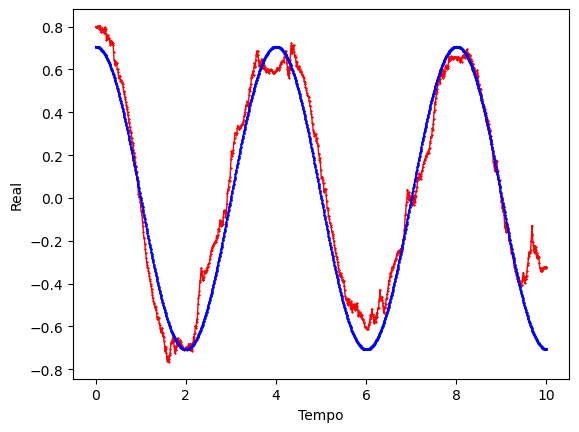

In [7]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_0.png', format='png')
plt.show()

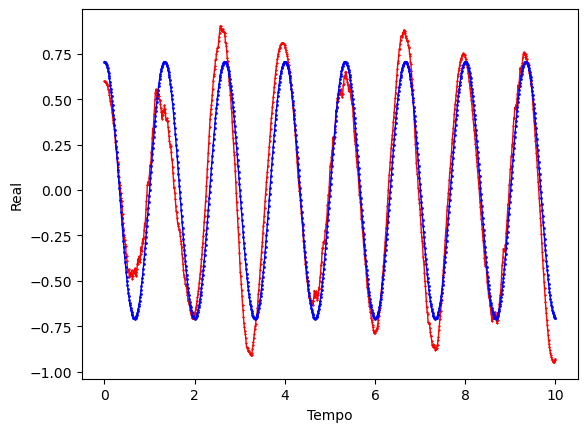

In [8]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[1]] 
y = [ele.imag for ele in Resp[1]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-3*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_1.png', format='png')
plt.show()